### Importación de datos



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


In [22]:
lista_tiendas = [ # crear una lista de tuplas con las tiendas para modularizar el código más tarde
    ('Tienda N°1', tienda),
    ('Tienda N°2', tienda2),
    ('Tienda N°3', tienda3),
    ('Tienda N°4', tienda4)
]

tiendas_con_mejor_desempeño = {} # crear un diccionario para almacenar las tiendas con mejor desempeño
tiendas_con_peor_desempeño = {} # crear un diccionario para almacenar las tiendas con peor desempeño

# 1. Análisis de facturación



In [23]:
# calcular la suma de la columna Precio de las tiendas
def calcular_facturacion(lista_tiendas):
    facturaciones = {}  # Inicializar el diccionario dentro de la función
    for numero_de_tienda, tienda_df in lista_tiendas:  # recorrer cada tupla (nombre, DataFrame)
        facturaciones[numero_de_tienda] = tienda_df['Precio'].sum() # seleccionar la tienda y calcular la suma de la columna precio
    return facturaciones # devolver el diccionario

facturacion_por_tiendas = calcular_facturacion(lista_tiendas) # llamar a la función y guardar el resultado en una variable

# determinar mayor y menor facturación
mayor_facturacion = max(facturacion_por_tiendas, key=facturacion_por_tiendas.get)
menor_facturacion = min(facturacion_por_tiendas, key=facturacion_por_tiendas.get)

# agregar los mejores y peores resultados al diccionario
tiendas_con_mejor_desempeño['Mayor facturación'] = mayor_facturacion
tiendas_con_peor_desempeño['Menor facturación'] = menor_facturacion

# mostrar el total por tienda
for numero_tienda, total in facturacion_por_tiendas.items(): 
    print(f"facturación total de la {numero_tienda}: {total:,.2f}")

# imprimir resultados
print(f'\nLa tienda con mayor facturación es la {mayor_facturacion} con un total de {facturacion_por_tiendas[mayor_facturacion]:,.2f}.')
print(f'La tienda con menor facturación es la {menor_facturacion} con un total de {facturacion_por_tiendas[menor_facturacion]:,.2f}.')

facturación total de la Tienda N°1: 1,150,880,400.00
facturación total de la Tienda N°2: 1,116,343,500.00
facturación total de la Tienda N°3: 1,098,019,600.00
facturación total de la Tienda N°4: 1,038,375,700.00

La tienda con mayor facturación es la Tienda N°1 con un total de 1,150,880,400.00.
La tienda con menor facturación es la Tienda N°4 con un total de 1,038,375,700.00.


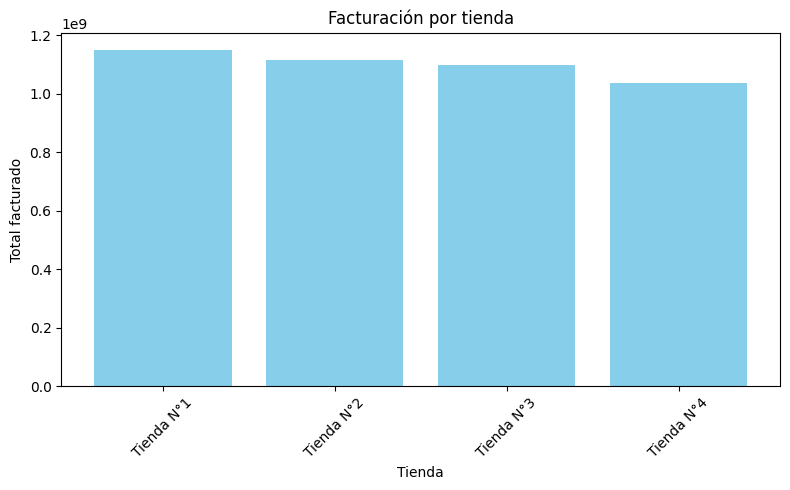

In [24]:
# datos
nombres_tiendas = list(facturacion_por_tiendas.keys())
totales = list(facturacion_por_tiendas.values())

# Crear gráfico
plt.figure(figsize=(8, 5)) # crea el lienzo del grafico
plt.bar(nombres_tiendas, totales, color='skyblue') # genera el gráfico de barras, usando el parametro de color
plt.title('Facturación por tienda') # titulo del grafico
plt.xlabel('Tienda') # etiqueta del eje x
plt.ylabel('Total facturado') # etiqueta del eje y
plt.xticks(rotation=45) # rota las etiquetas para que entren mejor en la imagen
plt.tight_layout() # ajusta el gráfico para que no se corten las etiquetas

# Mostrar gráfico
plt.show()

# 2. Ventas por categoría

In [25]:
# calcular las ventas por tienda y por categoría
def ventas_por_tienda(lista_tiendas):
    ventas_por_tienda_y_categoria = {}
    
    for numero_de_tienda, tienda_df in lista_tiendas: # recorrer cada tupla (nombre, DataFrame)
        productos_vendidos = tienda_df.groupby('Categoría del Producto').size() # agrupar por la categoria del producto y calcular el tamaño del grupo
        ventas_por_tienda_y_categoria[numero_de_tienda] = productos_vendidos # añadir el resultado al diccionario
    return ventas_por_tienda_y_categoria

# calcular el producto más y menos vendido por tienda
def productos_populares_por_tienda(lista_tiendas):
    productos_populares = {}

    for numero_de_tienda, tienda_df in lista_tiendas:
        
        conteo_productos = tienda_df['Categoría del Producto'].value_counts()
        mas_vendido = conteo_productos.idxmax()
        menos_vendido = conteo_productos.idxmin()
        
        productos_populares[numero_de_tienda] = {
            'Más vendido': mas_vendido,
            'Menos vendido': menos_vendido
        }
    return productos_populares

productos_populares = productos_populares_por_tienda(lista_tiendas)

# mostrar resultados
for tienda, productos in productos_populares.items():
    print(f'\n{tienda}:')
    print(f"  Producto más vendido: {productos['Más vendido']}")
    print(f"  Producto menos vendido: {productos['Menos vendido']}")
    

ventas_por_tienda_y_categoria = ventas_por_tienda(lista_tiendas) # llamar a la función y guardar el resultado en una variable



Tienda N°1:
  Producto más vendido: Muebles
  Producto menos vendido: Artículos para el hogar

Tienda N°2:
  Producto más vendido: Muebles
  Producto menos vendido: Artículos para el hogar

Tienda N°3:
  Producto más vendido: Muebles
  Producto menos vendido: Instrumentos musicales

Tienda N°4:
  Producto más vendido: Muebles
  Producto menos vendido: Instrumentos musicales


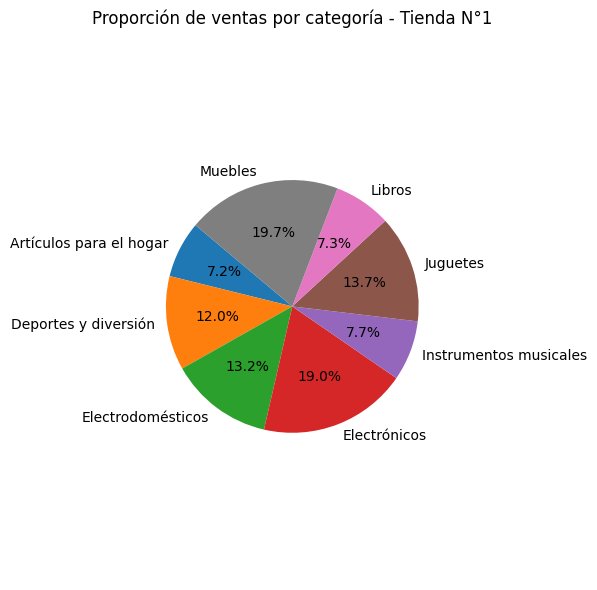

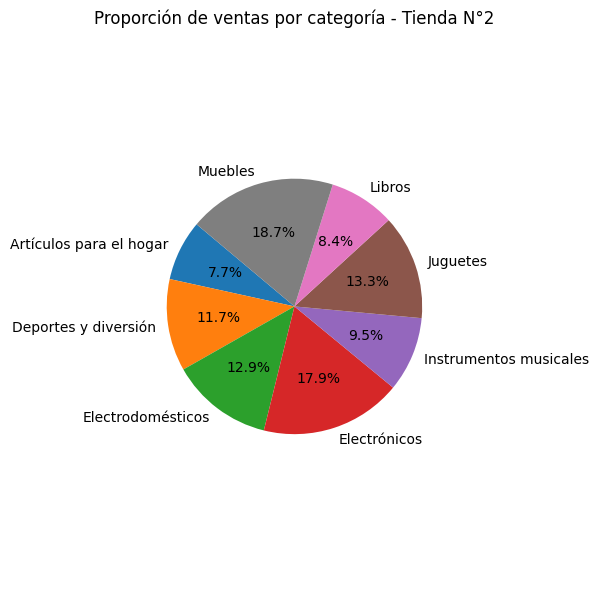

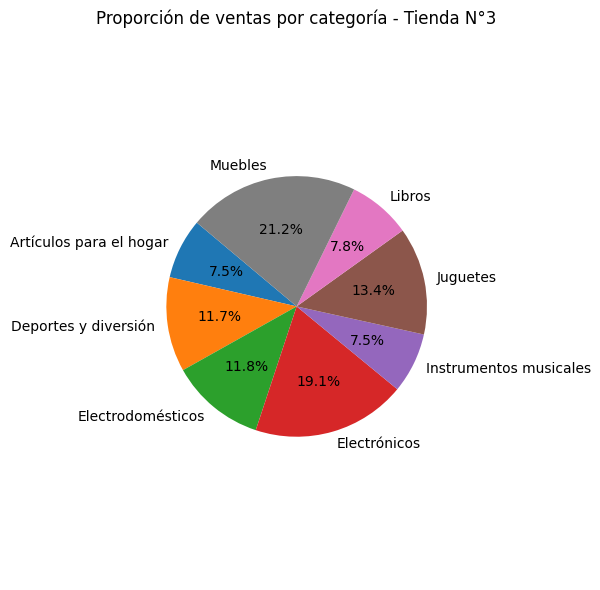

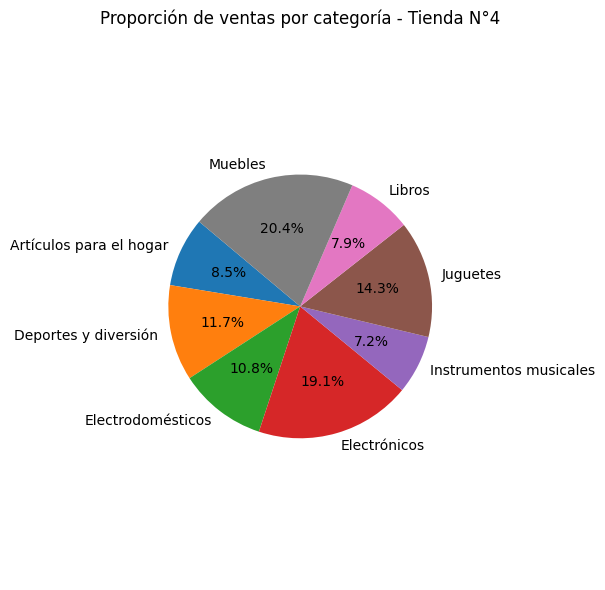

In [26]:
for tienda, ventas_categoria in ventas_por_tienda_y_categoria.items(): # usar un ciclo for para generar graficos para todas las tiendas
    plt.figure(figsize=(6, 6))  # Tamaño del gráfico
    plt.pie(ventas_categoria, labels=ventas_categoria.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proporción de ventas por categoría - {tienda}')
    plt.axis('equal')  # Para que el gráfico se vea circular
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [27]:
def calificacion_promedio(lista_tiendas): # definir una función para calcular la calificación promedio de cada tienda
    calificaciones = {} # generar un diccionario para almacenar las calificaciones de cada tienda
    
    for numero_tienda , tienda_df in lista_tiendas: # recorrer la lista de tuplas
        calficaciones = tienda_df['Calificación'].mean() # usar el metodo mean() para calcular el promedio de la columna 'Calificacion'
        calificaciones[numero_tienda] = round(calficaciones, 2) # redondear el promedio a dos decimales
    
    return calificaciones # devolver el diccionario

calificaciones_de_tiendas = calificacion_promedio(lista_tiendas) # asignar la salida de la función a una variable

mayor_calificacion = max(calificaciones_de_tiendas, key=calificaciones_de_tiendas.get) # calcular la mayor calificación
menor_calificacion = min(calificaciones_de_tiendas, key=calificaciones_de_tiendas.get) # calcular la menor calificación 

tiendas_con_mejor_desempeño['Mayor calificación'] = mayor_calificacion # agregar la mejor calificación al diccionario
tiendas_con_peor_desempeño['Menor calificación'] = menor_calificacion # agregar la peor calificación al diccionario

# mostrar los resultados    
for numero_tienda, tienda_df in calificaciones_de_tiendas.items(): # recorrer el diccionario
    print(f'La calificación promedio de la {numero_tienda} es {tienda_df}.')

print(f'\nLa tienda con mayor calificación es la {mayor_calificacion} con un total de {calificaciones_de_tiendas[mayor_calificacion]}.')
print(f'La tienda con menor calificación es la {menor_calificacion} con un total de {calificaciones_de_tiendas[menor_calificacion]}.')

La calificación promedio de la Tienda N°1 es 3.98.
La calificación promedio de la Tienda N°2 es 4.04.
La calificación promedio de la Tienda N°3 es 4.05.
La calificación promedio de la Tienda N°4 es 4.0.

La tienda con mayor calificación es la Tienda N°3 con un total de 4.05.
La tienda con menor calificación es la Tienda N°1 con un total de 3.98.


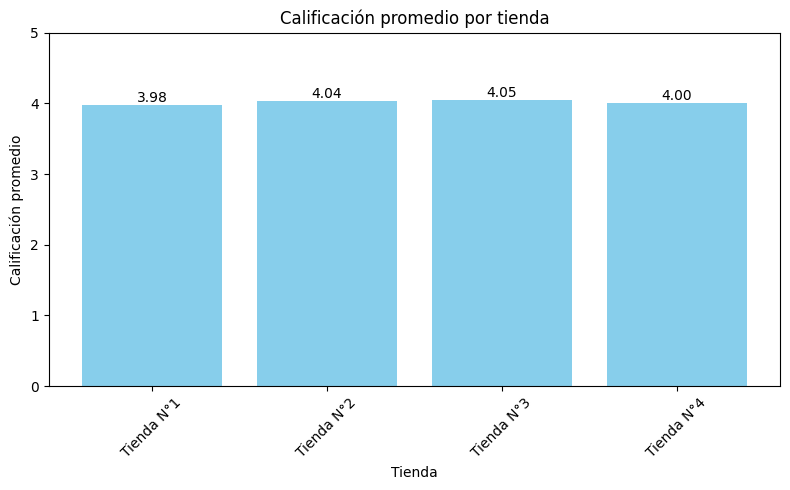

In [45]:
nombres = list(calificaciones_de_tiendas.keys())
promedios = list(calificaciones_de_tiendas.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(nombres, promedios, color='skyblue')
plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(0, 5)  # Las calificaciones van de 0 a 5
plt.xticks(rotation=45)

# Mostrar los valores encima de las barras
for bar, valor in zip(bars, promedios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{valor:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [34]:
productos_populares = {} # crear un diccionario para almacenar los resultados

for nombre, df in lista_tiendas: # iterar sobre la lista de tiendas
    ventas_por_producto = df.groupby('Categoría del Producto').size() # agrupar por la categoría del producto y contar el número de ventas
    mas_vendido = ventas_por_producto.idxmax() # usar la función idxmax() para obtener el índice del producto más vendido
    menos_vendido = ventas_por_producto.idxmin() # usar la función idxmin() para obtener el índice del producto menos vendido
    productos_populares[nombre] = {
        'Más vendido': mas_vendido,
        'Menos vendido': menos_vendido
    }

for index_tienda, producto in productos_populares.items(): # iterar sobre el diccionario para mostrar los resultados
    print(f"{index_tienda}:")
    print(f" - Producto más vendido: {producto['Más vendido']}")
    print(f" - Producto menos vendido: {producto['Menos vendido']}\n")


Tienda N°1:
 - Producto más vendido: Muebles
 - Producto menos vendido: Artículos para el hogar

Tienda N°2:
 - Producto más vendido: Muebles
 - Producto menos vendido: Artículos para el hogar

Tienda N°3:
 - Producto más vendido: Muebles
 - Producto menos vendido: Artículos para el hogar

Tienda N°4:
 - Producto más vendido: Muebles
 - Producto menos vendido: Instrumentos musicales



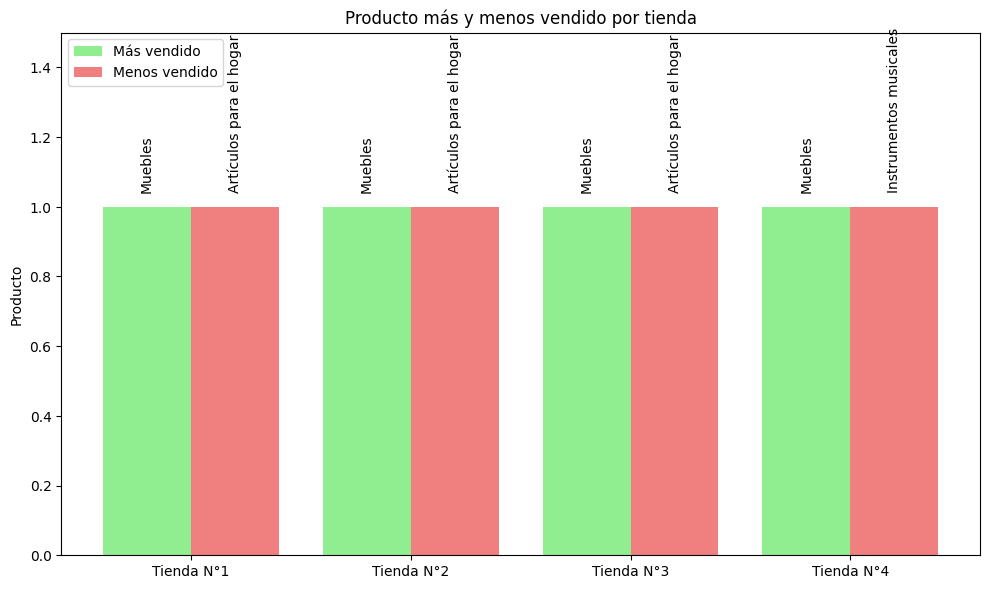

In [30]:
# Extraer datos para el gráfico
tiendas = list(productos_populares.keys())
mas_vendidos = [productos_populares[t]['Más vendido'] for t in tiendas]
menos_vendidos = [productos_populares[t]['Menos vendido'] for t in tiendas]

# Configurar posición de las barras
x = np.arange(len(tiendas))
ancho = 0.4  # ancho de las barras

plt.figure(figsize=(10, 6))
plt.bar(x - ancho/2, [1]*len(tiendas), width=ancho, label='Más vendido', color='lightgreen')  # Valores ficticios para visualización
plt.bar(x + ancho/2, [1]*len(tiendas), width=ancho, label='Menos vendido', color='lightcoral')

# Agregar etiquetas de texto en lugar de altura
for i in range(len(tiendas)):
    plt.text(x[i] - ancho/2, 1.05, mas_vendidos[i], ha='center', rotation=90)
    plt.text(x[i] + ancho/2, 1.05, menos_vendidos[i], ha='center', rotation=90)

# Ajustes del gráfico
plt.xticks(x, tiendas)
plt.ylim(0, 1.5)
plt.ylabel('Producto')
plt.title('Producto más y menos vendido por tienda')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [42]:
def calcular_envio_promedio_tienda(lista_tiendas):
    costos_envio_promedio = {} # generar un diccionario para almacenar los datos
    for nombre_tienda, df in lista_tiendas: # iterar sobre la lista
        costos_envio_promedio[nombre_tienda] = df['Costo de envío'].mean() # calcular el costo promedio de envío
    return costos_envio_promedio

envios_promedio = calcular_envio_promedio_tienda(lista_tiendas)

def mostrar_info(envios_promedio):
    for tienda, costo in envios_promedio.items(): # iterar sobre el diccionario
        print(f'El costo de envío promedio de la {tienda} es: {costo:,.2f}') # usar el formato :,.2f para mostrar el resultado con dos decimales
    
    tiendas_con_peor_desempeño['promedio_mas_costoso'] = max(envios_promedio, key=envios_promedio.get) # usar la función max() para calcular el costo promedio de envío más alto y añadirlo al diccionario
    tiendas_con_mejor_desempeño['promedio_mas_barato'] = min(envios_promedio, key=envios_promedio.get) # usar la función min() para calcular el costo promedio de envío más bajo y añadirlo al diccionario


mostrar_info(envios_promedio)

El costo de envío promedio de la Tienda N°1 es: 26,018.61
El costo de envío promedio de la Tienda N°2 es: 25,216.24
El costo de envío promedio de la Tienda N°3 es: 24,805.68
El costo de envío promedio de la Tienda N°4 es: 23,459.46


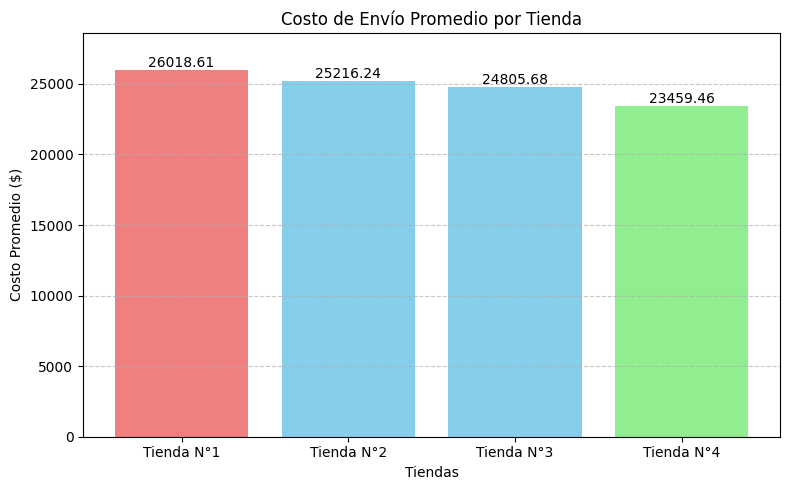

In [43]:
import matplotlib.pyplot as plt

def graficar_costos_promedio_coloreado(envios_promedio):
    nombres_tiendas = list(envios_promedio.keys())
    costos = list(envios_promedio.values())

    # Identificar menor y mayor promedio
    max_costo = max(costos)
    min_costo = min(costos)

    # Asignar colores: rojo si es el mayor, verde si es el menor, azul si es intermedio
    colores = ['lightcoral' if c == max_costo else 'lightgreen' if c == min_costo else 'skyblue' for c in costos]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(nombres_tiendas, costos, color=colores)

    # Mostrar valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',
                 ha='center', va='bottom')

    plt.title('Costo de Envío Promedio por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Costo Promedio ($)')
    plt.ylim(0, max(costos) * 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    
    plt.tight_layout()
    plt.show()

# Llamar a la función
graficar_costos_promedio_coloreado(envios_promedio)


In [ ]:
# Con base en los análisis realizados y los gráficos generados, es momento de sintetizar sus hallazgos en un informe final. Dentro de tu Colab, deberás redactar un texto explicando a qué tienda debe vender el Sr. Juan, teniendo en cuenta todos los factores analizados, como:

# Los ingresos totales de las tiendas.

# Las categorías de productos más y menos vendidas.

# Las calificaciones promedio de los clientes por tienda.

# Los productos más y menos vendidos.

# El coste de envío promedio para cada tienda.

# En su informe, incluya la justificación de su decisión, respaldada por el análisis y las visualizaciones que generó. Explicar, de forma clara y objetiva, las razones por las que una tienda destaca (o no) en relación a las demás, considerando las fortalezas y debilidades de cada una.

# Su informe debe estar bien estructurado, con una introducción que explique el propósito del análisis, un desarrollo con la presentación de datos y gráficos, y una conclusión recomendando la tienda que se debe vender y justificando la elección.